In [106]:
import pandas as pd
from collections import defaultdict
import re
import ast
import seaborn as sns
from pandas import Categorical
import matplotlib.pyplot as plt
import numpy as np


from __future__ import division

pd.options.display.max_columns = 999

%matplotlib inline

In [107]:
dftest = pd.read_csv('/home/adrienporter/McNulty/proj3-mcnulty/\
porter_adrien/watches/watches/watchbot_output/watchbot4.csv')

In [108]:
def unique_functions(df_columns):
    d = defaultdict(int)
    unique = set()
    for i in df_columns:
        separate = i.split(',')
        for j in separate:
            unique.add(j.strip())
    return unique
    

In [109]:
columns = unique_functions(dftest.columns)

In [110]:
f = open('/home/adrienporter/McNulty/proj3-mcnulty/porter_adrien/watches/watches/logs/scrapy_output3.txt', 'r')
log = f.read()
log_data = re.findall('{.+}', log)
dict_list = []
for i in log_data:
    dict_list.append(ast.literal_eval(i))
# dict_list

In [111]:
clean_dicts = []

for watch_dict in dict_list[1:]:
    for k, v in watch_dict.items():
        if k == v:
            for i in k.split(','):
                watch_dict[i.strip()] = 1
            watch_dict.pop(k, None)
    clean_dicts.append(watch_dict)
# clean_dicts


In [112]:
df = pd.DataFrame(clean_dicts)

In [113]:
df.head()

,,4 Year Calendar,Alarm,Annual calendar,Availability,Base Caliber,Blue Steel Hands,Bracelet color,Bracelet length,Bracelet material,Bracelet thickness,Brand,Buckle width,Case diameter,Case material,Center Seconds,Chiming clock,Chronograph,Chronometer,Clasp,Clasp material,Code,Condition,Crown Left,Date,Dial,Dial numerals,Display Back,Double Chronograph,Equation of time,Flyback,Frequency,GMT,Gemstone,Gender,Genevian Seal,Glass,Guilloche Dial,Guilloche Dial (handwork),Helium Valve,Jumping hour,Limited Edition,Location,Luminescent Hands,Luminescent Numerals,Luminous indexes,Material bezel,Minute Repeater,Month,Moonphase,Movement,Movement/Caliber,Number of jewels,Only Original Parts,PVD/DLC coating,Panorama-Date,Perpetual Calendar,Power Reserve Display,Power reserve,Price,Quick Set,Ref. No.,Repeater,Rotating Bezel,Screw-Down Crown,Screw-Down Push-Buttons,Skeletonized,Small Seconds,Tachymeter,Thickness,Tourbillon,Waterproof,Weekday,Year,url
0,NaN,NaN,NaN,NaN,Available now,NaN,NaN,Gold,NaN,White Gold,NaN,Rolex,NaN,29 mm,White gold,NaN,NaN,NaN,NaN,Fold clasp,NaN,15312,2 (fine),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ladies' watch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"United States, New York, New York",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic,Automatic Self Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$12,999 [Negotiable]",NaN,80319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10 mm,NaN,NaN,NaN,NaN,http://www.chrono24.com/rolex/datejust-80319-1...
1,With papers,NaN,NaN,NaN,Available now,NaN,NaN,Silver,NaN,NaN,NaN,Rolex,NaN,41 mm,White gold,NaN,NaN,NaN,NaN,Fold clasp,NaN,ROLE310959_1,1 (mint),NaN,NaN,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men's watch/Unisex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"United States, Pennsylvania, Philadelphia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$29,500",NaN,218239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10 ATM,NaN,NaN,http://www.chrono24.com/rolex/day-date-ii-2182...
2,NaN,NaN,NaN,NaN,Available now,NaN,NaN,Gold/Steel,NaN,Gold/Steel,NaN,Rolex,NaN,36 mm,Steel,NaN,NaN,NaN,NaN,Fold clasp,Steel,RX0105171X,1 (mint),NaN,NaN,Silver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men's watch/Unisex,NaN,Sapphire Glass,NaN,NaN,NaN,NaN,NaN,"United States, New York, New York",NaN,NaN,NaN,Yellow gold,NaN,NaN,NaN,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$6,199 [Negotiable]",NaN,16263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,http://www.chrono24.com/rolex/mens-rolex-datej...
3,With papers,NaN,NaN,NaN,Available now,NaN,NaN,Gold,NaN,NaN,NaN,Rolex,NaN,26 x 32.6 mm,NaN,NaN,NaN,NaN,NaN,"Fold clasp, hidden",NaN,RLX6811,1 (mint),NaN,NaN,Mother of pearl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ladies' watch,NaN,Sapphire Glass,NaN,NaN,NaN,NaN,NaN,"United States, Texas, Austin",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic,Rolex 2235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$15,900",NaN,179368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11 mm,NaN,NaN,NaN,2002,http://www.chrono24.com/rolex/--ladies-preside...
4,With box,NaN,NaN,NaN,Available now,NaN,NaN,NaN,NaN,NaN,NaN,Rolex,NaN,31 mm,Steel,NaN,NaN,NaN,NaN,NaN,NaN,W11364,1 (mint),NaN,NaN,Silver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sapphire Glass,NaN,NaN,NaN,NaN,NaN,"United States, California, Newport Beach",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$4,125",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30 ATM,NaN,NaN,http://www.chrono24.com/rolex/datejust-mid-siz...


## Clean Case Diameter

In [114]:
import re
def clean_case_d(s):
    try:
        x = re.findall(r'^[0-9.,]+', s)
        x = re.sub(',', '.', x[0])
        if int(x[0]) > 60:
            return None
        else:
            return x
    except:
        return None
    

In [115]:
df['Case diameter'] = df['Case diameter'].apply(clean_case_d)
df['Case diameter'] = pd.to_numeric(df['Case diameter'], errors='coerce')

## Clean Price

In [116]:
def clean_price(s):
    try:
        x = re.findall(r'[0-9,]+', s)
        x = re.sub(',', '', x[0])
        return x
    except:
        return None
    

In [117]:
df['Price'] = df['Price'].apply(clean_price)

In [118]:
df['Price'] = pd.to_numeric(df['Price'])

## Clean Year

In [119]:
def clean_year(s):
    try:
        x = re.findall(r'([0-9]{4})', s)
        if int(x[0]) > 2018 or int(x[0])< 1700:
            return None
        else:
            return x[0]
    except:
        return None
    

In [120]:
df['Year'] = df['Year'].apply(clean_year)

## Clean Frequency

In [121]:
# df[df['Frequency'] == '28.800 Hz']
# df['Frequency'].value_counts()


In [122]:
def clean_freq(s):
    try:
        x = re.findall(r'([0-9]{4})', s)
        if int(x[0]) > 2018 or int(x[0])< 1700:
            return None
        else:
            return x[0]
    except:
        return None
    

## Clean Power Reserve

In [123]:
def clean_pr(s):
    try:
        x = re.findall(r'[0-9]+', s)
        if int(x[0]) > 2000:
            return None
        else:
            return x[0]
    except:
        return None

In [124]:
df['Power reserve'] = df['Power reserve'].apply(clean_pr)

## Model Part 1: Predict Price

In [125]:
# rearrange columns
cols = df.columns.tolist()
cols = cols[11:] + cols[:11]
# cols

In [126]:
df2 = df[cols]
# df2.head()

In [127]:
df2[df2.Price > 1.900000e+06]

,Brand,Buckle width,Case diameter,Case material,Center Seconds,Chiming clock,Chronograph,Chronometer,Clasp,Clasp material,Code,Condition,Crown Left,Date,Dial,Dial numerals,Display Back,Double Chronograph,Equation of time,Flyback,Frequency,GMT,Gemstone,Gender,Genevian Seal,Glass,Guilloche Dial,Guilloche Dial (handwork),Helium Valve,Jumping hour,Limited Edition,Location,Luminescent Hands,Luminescent Numerals,Luminous indexes,Material bezel,Minute Repeater,Month,Moonphase,Movement,Movement/Caliber,Number of jewels,Only Original Parts,PVD/DLC coating,Panorama-Date,Perpetual Calendar,Power Reserve Display,Power reserve,Price,Quick Set,Ref. No.,Repeater,Rotating Bezel,Screw-Down Crown,Screw-Down Push-Buttons,Skeletonized,Small Seconds,Tachymeter,Thickness,Tourbillon,Waterproof,Weekday,Year,url,,4 Year Calendar,Alarm,Annual calendar,Availability,Base Caliber,Blue Steel Hands,Bracelet color,Bracelet length,Bracelet material,Bracelet thickness
22454,Patek Philippe,NaN,33.0,White gold,NaN,NaN,NaN,NaN,Buckle,NaN,6002G-001 bnib,0 (unworn),NaN,1.0,Blue,Roman numerals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men's watch/Unisex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"United States, California, Newport Beach",NaN,NaN,NaN,White gold,NaN,NaN,NaN,Automatic,6002G,NaN,NaN,NaN,NaN,1.0,NaN,None,1950000.0,NaN,6002G-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,http://www.chrono24.com/patekphilippe/6002g-00...,NaN,NaN,NaN,NaN,Ready to ship in 3-5 days,NaN,NaN,NaN,NaN,Leather,NaN


In [128]:
# drop unnecessary columns
df2 = df2.drop(['Code', 'Movement/Caliber', 'url', 'Availability', 'Location', 'Buckle width',\
               '', 'Number of jewels', 'Ref. No.', 'Thickness', 'Base Caliber', 'Bracelet length',\
                'Bracelet thickness', 'Frequency'], axis=1)


In [129]:
vars_to_dummy = ['Case material', 'Clasp', 'Clasp material', 'Condition', 'Dial', 'Dial numerals', 'Gender', 'Glass',\
           'Material bezel', 'Movement', 'Waterproof', 'Bracelet color', 'Bracelet material', 'Brand']

continuous_vars = ['Year', 'Price', 'Case diameter']

In [130]:
for i in df2.columns:
    if i not in vars_to_dummy + continuous_vars:
        df2[str(i)] = df2[str(i)].fillna(0)

In [131]:
df2 = df2.dropna(subset=['Price', 'Case diameter', 'Case material'])
df2 = df2.drop(['Clasp', 'Clasp material', 'Condition', 'Dial', 'Dial numerals', \
                        'Gender', 'Glass', 'Material bezel', 'Movement', 'Movement', 'Waterproof', 'Year',\
                        'Bracelet color', 'Bracelet material'], axis=1)
df2['log Case diameter'] = np.log(df2['Case diameter'])

In [132]:
df2 = pd.get_dummies(df2, columns=['Brand', 'Case material'], drop_first=True)

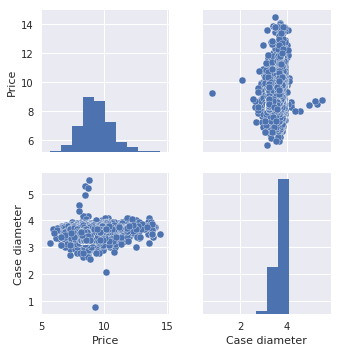

In [133]:
sns.pairplot(np.log(df2[['Price', 'Case diameter']]))

In [134]:
df2.corr()['Price'].sort_values(ascending=False)

Price                        1.000000
Minute Repeater              0.236550
Case material_Platinum       0.225693
Case material_White gold     0.189077
Tourbillon                   0.184595
Perpetual Calendar           0.164214
Brand_Patek Philippe         0.146139
Moonphase                    0.130154
Month                        0.109179
Skeletonized                 0.105841
Case material_Pink gold      0.102516
4 Year Calendar              0.091691
Power Reserve Display        0.071326
Small Seconds                0.067143
Jumping hour                 0.066418
log Case diameter            0.056777
Case diameter                0.048964
Display Back                 0.042593
Limited Edition              0.031443
Chiming clock                0.028896
Annual calendar              0.025488
Case material_Carbon         0.017312
Case material_Titanium       0.014054
Center Seconds               0.008717
Weekday                      0.008236
Equation of time             0.007092
Guilloche Di

In [135]:
# l = df2.columns
# for i, k in enumerate(l):
#     print i, k

In [136]:
X = df2.drop('Price', axis=1)
y = df2['Price']
y_log = np.log(df2['Price'])

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.4)

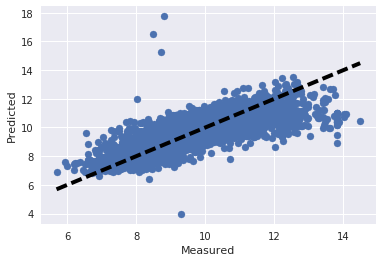

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
lr = LinearRegression()
# lr.fit(X, y)
predicted = cross_val_predict(lr, X, y_log, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_log, predicted)
ax.plot([np.log(y.min()), np.log(y.max())], [np.log(y.min()), np.log(y.max())], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
# lr.coef_

0.72459208708


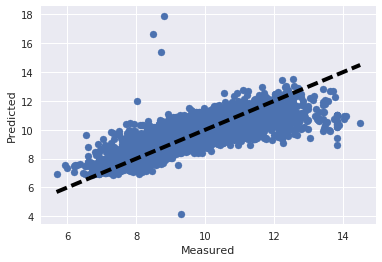

In [139]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn import metrics

rcv = RidgeCV(cv=10)
k_fold = KFold(5)
rcv.fit(X_train, y_train)
print rcv.score(X_test, y_test)

# for k, (train, test) in enumerate(k_fold.split(X, y)):
#     rcv.fit(X.iloc[train], y.iloc[train])
#     print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
#           format(k, rcv.alpha_, rcv.score(X.iloc[test], y.iloc[test])))

predicted = cross_val_predict(rcv, X, y_log, cv=10)
fig, ax = plt.subplots()
ax.scatter(y_log, predicted)
ax.plot([np.log(y.min()), np.log(y.max())], [np.log(y.min()), np.log(y.max())], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

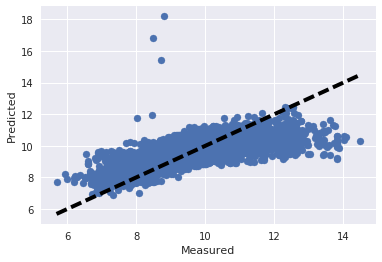

In [140]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(cv=10)
lcv.fit(X_train, y_train)
lcv.score(X_test, y_test)

predicted = cross_val_predict(lcv, X, y_log, cv=10)
fig, ax = plt.subplots()
ax.scatter(y_log, predicted)
ax.plot([np.log(y.min()), np.log(y.max())], [np.log(y.min()), np.log(y.max())], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

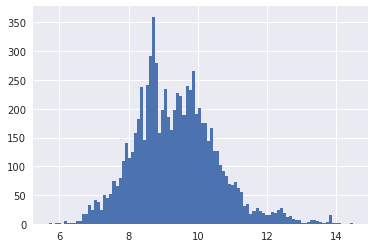

In [141]:
import scipy.stats as stats
y_log.hist(bins=100)

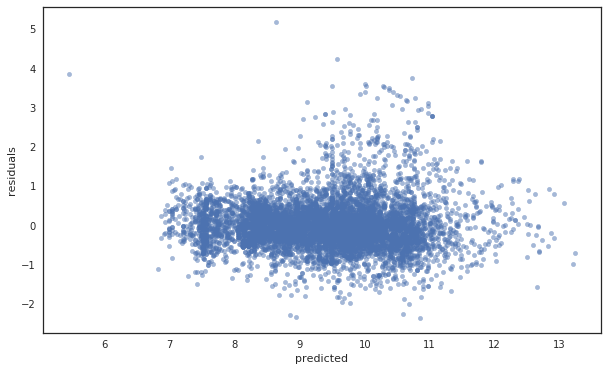

In [143]:
predicted = rcv.predict(X)
residuals = y_log - predicted

df_plot = pd.DataFrame({'predicted' : predicted, 'residuals' : residuals}) 

with sns.axes_style('white'):
    plot=df_plot.plot(kind='scatter',
                  x='predicted',y='residuals',alpha=0.5,figsize=(10,6))



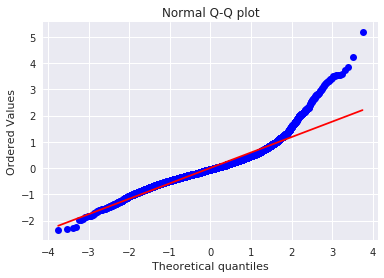

In [144]:
stats.probplot(df_plot['residuals'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

## Model Part 2: Classify Over/Under-valued

In [145]:
# Create over/undervalued label

def valuation(x):
    n = [0 if v > 0 else 1 for v in x]
    return n
            

In [146]:
df2['Overvalued'] = valuation(y_log - predicted)

In [147]:
df2['Overvalued'].value_counts()

1    4294
0    3504
Name: Overvalued, dtype: int64

In [148]:
X = df2.drop(['Overvalued', 'Price', 'Case diameter'], axis=1)
y = df2['Overvalued']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [150]:
from sklearn import linear_model, decomposition, datasets
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

logistic = linear_model.LogisticRegressionCV(cv=10)
logistic.fit(X_train, y_train)
coefs = logistic.coef_

scores = cross_val_score(logistic, X_test, y_test, cv=10, n_jobs = 1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.56 (+/- 0.04)


In [151]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [152]:
from itertools import cycle
from scipy import interp

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

def ROC_StratKfold_cv(classifier, X, y):
    # Run classifier with cross-validation and plot ROC curves
    skf = StratifiedKFold(n_splits=6)
    scores_train = []
    scores_test = []

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

    colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
    lw = 2

    i = 0
    
#     plt.figure(figsize=(15,10))
    
    for (train, test), color in zip(skf.split(X, y), colors):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        train_acc = classifier.score(X.iloc[train], y.iloc[train])
        test_acc = classifier.score(X.iloc[test], y.iloc[test])
        scores_train.append(train_acc) 
        scores_test.append(test_acc)
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=lw, color=color,
                 label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
             label='Luck')

    mean_tpr /= skf.get_n_splits(X, y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)


    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print("Training Data Accuracy: %0.2f" %(np.mean(scores_train)))
    print("Test Data Accuracy:     %0.2f" %(np.mean(scores_test)))
    
    y_true = y.iloc[test]
    y_pred = classifier.predict(X.iloc[test])


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

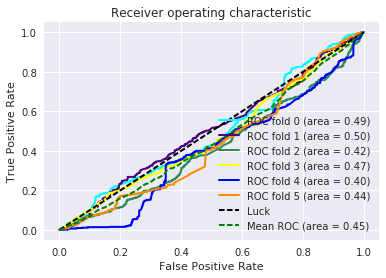

Training Data Accuracy: 0.55
Test Data Accuracy:     0.55
[[  0 584]
 [  0 715]]


Precision:              nan
Recall:                 0.00


/home/adrienporter/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:70: RuntimeWarning: invalid value encountered in long_scalars


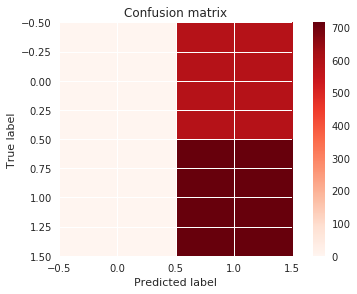

In [154]:
logCV_clf = linear_model.LogisticRegressionCV(cv=10)
ROC_StratKfold_cv(logCV_clf, X, y)

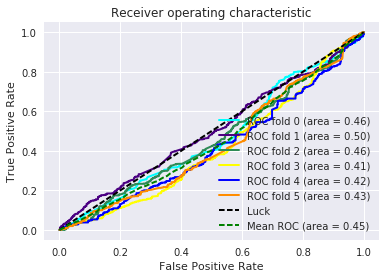

Training Data Accuracy: 0.58
Test Data Accuracy:     0.50
[[187 397]
 [260 455]]


Precision:              0.42
Recall:                 0.32


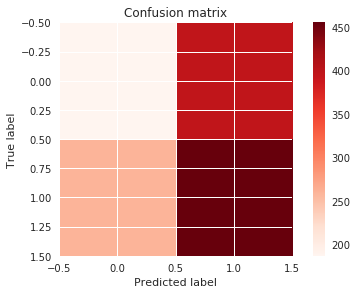

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

log_clf = LogisticRegression()
ROC_StratKfold_cv(log_clf, X, y)

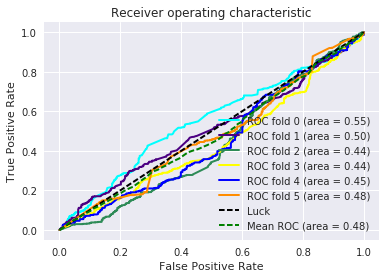

Training Data Accuracy: 0.46
Test Data Accuracy:     0.46
[[296 288]
 [391 324]]


Precision:              0.43
Recall:                 0.51


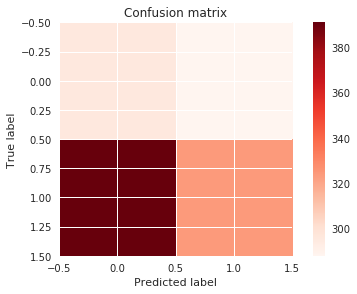

In [156]:
from sklearn import naive_bayes

NB_clf = naive_bayes.GaussianNB()
ROC_StratKfold_cv(NB_clf, X, y)

In [157]:
# NB_clf = naive_bayes.BernoulliNB()
# ROC_StratKfold_cv(NB_clf, X, y)

In [158]:
# NB_clf = naive_bayes.MultinomialNB()
# ROC_StratKfold_cv(NB_clf, X, y)

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

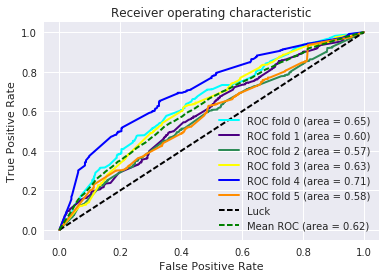

Training Data Accuracy: 0.86
Test Data Accuracy:     0.59
[[281 303]
 [258 457]]


Precision:              0.52
Recall:                 0.48


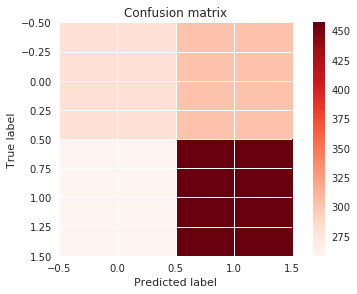

In [160]:
r1 = RandomForestClassifier()
ROC_StratKfold_cv(r1, X, y)

In [ ]:
# l1 = LinearSVC()
# ROC_StratKfold_cv(l1, X, y)

In [ ]:
# s1 = SVC()
# ROC_StratKfold_cv(s1, X, y)

In [ ]:
# d1 = DecisionTreeClassifier()
# ROC_StratKfold_cv(d1, X, y)

In [ ]:
r1.get_params()

In [ ]:
importances = r1.feature_importances_
std = np.std([tree.feature_importances_ for tree in r1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, 20])
plt.show()

In [ ]:
X.columns[1]

In [ ]:
importances